Introduction

Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Data Collection/Curation + Parsing

    Before we do any type of data science we must do two things:
        1) Get data
        2) Parse data
    
    Data comes in the form of datasets which can be created or found *(I'll list some resources at the bottom). In this case we will be using following two datasets:
    
        Table D-1. Historical Median Income Using Alternative Price Indices: 1967 to 2021
        https://www2.census.gov/programs-surveys/demo/tables/p60/276/tableD1.xlsx

    
        Table 330.10. Average undergraduate tuition, fees, room, and board rates charged for full-time students in degree-granting postsecondary institutions, by level and control of institution: Selected years, 1963-64 through 2020-21
        https://nces.ed.gov/programs/digest/d21/tables/xls/tabn330.10.xls

    If you open up these files you'll notice that they aren't just datasets. They both have headers and footnotes which we don't want. To adjust for this we parse the data. Parsing is the act of fitting files into our use case and cleaning them up so they are easier to work with. We'll be going over the parsing as we do it.

    <-- Footnotes -->
    Free resources for finding Datasets:
    https://www.kaggle.com/
    https://datasetsearch.research.google.com/
    https://en.wikipedia.org/wiki/List_of_open_government_data_sites

    You can also often find datasets directly on the sites of organizations.



In [6]:
# Importing excel data into a pandas dataframe (Skipping the header and footnotes)
# NOTE: We are also cutting off some data in the 'df_college_cost' that will wont be using for this tutorial. 
df_median_income = pd.read_excel('https://www2.census.gov/programs-surveys/demo/tables/p60/276/tableD1.xlsx', skiprows=5, skipfooter=26)
df_college_cost = pd.read_excel('https://nces.ed.gov/programs/digest/d21/tables/xls/tabn330.10.xls', skiprows=[0,1,2,4], skipfooter=53)

# We'll display the heads of the table so we can get an idea of what they look like
display(df_median_income.head())
display(df_college_cost.head())

,Unnamed: 0,Estimate,Margin of\nerror1 (±),Estimate.1,Margin of\nerror1 (±).1,Estimate.2,Margin of\nerror1 (±).2,Estimate.3,Margin of\nerror1 (±).3
0,2021,70784.000000,605.000000,70784.00,605.0,70784.000000,605.000000,70784.000000,605
1,2020 2,68010.283709,879.912782,71186.00,921.0,71117.409473,920.112580,71117.409473,920
2,2019,68702.748083,904.921053,72808.49,959.0,72612.823597,956.422772,72612.823597,956
3,2018,63179.264160,691.405514,68168.00,746.0,67745.710038,741.378648,67745.710038,741
4,2017 3,61135.666667,529.285714,67571.00,585.0,66877.413663,578.995235,66877.413663,579


,Unnamed: 0,All insti-tutions,4-year,2-year,All insti-tutions.1,4-year.1,2-year.1,All insti-tutions.2,4-year.2,2-year.2,...,2-year.4,All insti-tutions.5,4-year.5,2-year.5,All insti-tutions.6,4-year.6,2-year.6,All insti-tutions.7,4-year.7,2-year.7
0,All institutions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1963-64,10647.560685,10973.419962,6616.176052,4336.485596,4714.725456,1461.132123,2408.995351,2377.060276,1784.429953,...,775.433503,508.247693,552.578415,171.248587,282.340689,278.597813,209.139956,457.334166,454.937898,395.044960
2,1968-69,10761.619228,11400.863864,7768.613279,4399.734947,5041.302500,1847.435646,2658.026787,2656.948648,2411.736521,...,1052.943480,596.331940,683.288820,250.398012,360.264036,360.117907,326.882309,502.013997,501.845282,475.663160
3,1969-70,10867.658503,11664.805710,7588.871723,4494.224441,5259.592862,1723.750009,2711.470481,2729.899729,2416.688472,...,1089.373133,645.140350,755.008039,247.442178,389.228228,391.873724,346.912636,525.670335,527.586644,495.018319
4,1970-71,10947.894604,11819.924047,7421.699083,4557.678257,5390.787280,1652.395594,2774.404823,2794.910341,2447.272193,...,1120.371939,688.022348,813.787615,249.443912,418.821253,421.916745,369.437653,545.839130,548.619024,501.490373


    If you've looked at the excel files then you would know that there are a few things wrong here. For one, almost all of the values have for some reason turned into floats when they should be integers, the years are wrongly formatted, and we've lost information on what the columns represent. But before we deal with that we can make the problem easier for us by removing unnecessary columns.

    For our 'df_median_income' we will only be using the first three columns: Year, Current Dollars- Estimate, and Current Dollars- Margin of error.

    For our 'df_college_cost' we will only use the 1st, 14th, 17th, 20th, and 23rd columns which represent the current dollars estimate cost for all institutions (2 and 4 year) in regards to total cost, only tuition and fees, only dormitory rooms, and only board.

In [7]:
# Dropping columns from df_median_income
df_median_income.drop(columns=df_median_income.columns[3:], inplace=True)

# Displaying head of Dataframe so we can see changes
df_median_income.head()

,Unnamed: 0,Estimate,Margin of\nerror1 (±)
0,2021,70784.000000,605.000000
1,2020 2,68010.283709,879.912782
2,2019,68702.748083,904.921053
3,2018,63179.264160,691.405514
4,2017 3,61135.666667,529.285714


In [8]:
# Dropping columns from df_college_cost
df_college_cost.drop(columns=df_college_cost.columns[1:13], inplace=True)
four_year_columns = df_college_cost.columns[2::3]
two_year_columns = df_college_cost.columns[3::3]
df_college_cost.drop(columns=four_year_columns, inplace=True)
df_college_cost.drop(columns=two_year_columns, inplace=True)

# Displaying head of Dataframe so we can see changes
df_college_cost.head()

,Unnamed: 0,All insti-tutions.4,All insti-tutions.5,All insti-tutions.6,All insti-tutions.7
0,All institutions,NaN,NaN,NaN,NaN
1,1963-64,1247.922549,508.247693,282.340689,457.334166
2,1968-69,1458.609973,596.331940,360.264036,502.013997
3,1969-70,1560.038913,645.140350,389.228228,525.670335
4,1970-71,1652.682730,688.022348,418.821253,545.839130


    Now that we've isolated the columns we are planning on using we can rename the columns so they're easier to work with.

In [9]:
# Renaming Columns
df_median_income.columns = ['Year', 'Estimate', 'Error']
df_college_cost.columns = ['Year', 'Total', 'Tuition and Fees', 'Dormitory', 'Board']

    Looking back at the 'df_median_income' dataframe there are three things we want to fix:
        1) The years being miss-formatted
        2) The values being floats instead of integers.
        3) We have a couple duplicate years

In [10]:
# Data Parsing

# Fixing the format of the 'Year' column
df_median_income['Year'] = df_median_income['Year'].astype(str).str.slice(0,4)
df_median_income = df_median_income.apply(pd.to_numeric)

# Turning the floats back into integers
df_median_income = df_median_income.apply(lambda x: round(x,0))
df_median_income = df_median_income.astype(int)

# Displaying head of Dataframe so we can see changes
df_median_income.head()

,Year,Estimate,Error
0,2021,70784,605
1,2020,68010,880
2,2019,68703,905
3,2018,63179,691
4,2017,61136,529


In [11]:
# Finding duplicate years
df_median_income[df_median_income['Year'].duplicated(keep=False)]

,Year,Estimate,Error
4,2017,61136,529
5,2017,61372,551
9,2013,53585,1076
10,2013,51939,454


In [12]:
# We'll chose to keep the first of each duplicate year
df_median_income.drop_duplicates(subset=['Year'], keep='first', inplace=True)

# Rest index to make the dataframe easier to work with
df_median_income.reset_index(drop=True, inplace=True)

# Confirming the dropping gof duplicate years.
df_median_income[df_median_income['Year'].duplicated(keep=False)]

,Year,Estimate,Error


    The 'df_college_cost' dataframe has three issues with it:
        1) The 'df_college_cost' is actually three datasets in one
        2) The years are miss-formatted
        3) The values are floats, not integers

    We'll deal with these issues by by splitting the datasets into their own dataframes and parsing teh data into the correct format.

In [13]:
# Finding the row locations for the labels of the three datasets
df_college_cost[df_college_cost['Year'].astype(str).str.match(r'^\D')]

,Year,Total,Tuition and Fees,Dormitory,Board
0,All institutions,NaN,NaN,NaN,NaN
55,Public insti-\n tutions,NaN,NaN,NaN,NaN
110,Private \n nonprofit and\n for-profit\n ...,NaN,NaN,NaN,NaN


In [14]:
# We'll remove these labels so we can parse the data into numeric types
df_college_cost.drop([0,55,110], inplace=True)

# We can see from this output that we've correctly removed the labels
df_college_cost[df_college_cost['Year'].astype(str).str.match(r'^\D')]

,Year,Total,Tuition and Fees,Dormitory,Board


In [15]:
# Now we Parse the Data

# Fixing the format of the 'Year' column
df_college_cost['Year'] = df_college_cost['Year'].astype(str).str.slice(0,4)
df_college_cost = df_college_cost.apply(pd.to_numeric)

# Turning the floats back into integers
df_college_cost = df_college_cost.apply(lambda x: round(x,0))
df_college_cost = df_college_cost.astype(int)

# Displaying head of Dataframe so we can see changes
df_college_cost.head()

,Year,Total,Tuition and Fees,Dormitory,Board
1,1963,1248,508,282,457
2,1968,1459,596,360,502
3,1969,1560,645,389,526
4,1970,1653,688,419,546
5,1971,1730,724,445,562


In [16]:
# Splitting Dataset into different tables
df_college_cost_all = df_college_cost[:55]
df_college_cost_public = df_college_cost[56:110]
df_college_cost_private = df_college_cost[111:]

# Resting the indexes to make the new datasets easier to work with
df_college_cost.reset_index(drop=True, inplace=True)
df_college_cost_all.reset_index(drop=True, inplace=True)
df_college_cost_public.reset_index(drop=True, inplace=True)
df_college_cost_private.reset_index(drop=True, inplace=True)

Data Management/Representation

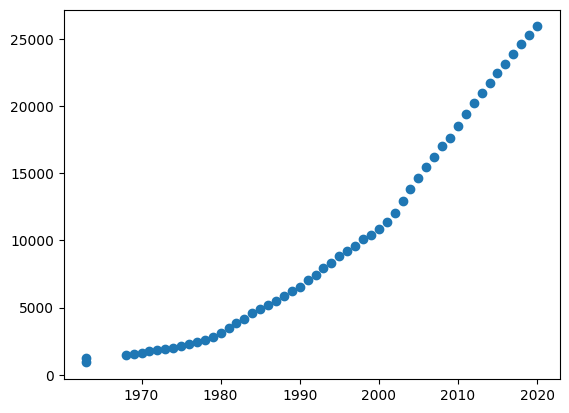

In [18]:
plt.scatter(
    x= df_college_cost_all['Year'],
    y= df_college_cost_all['Total']
)

plt.

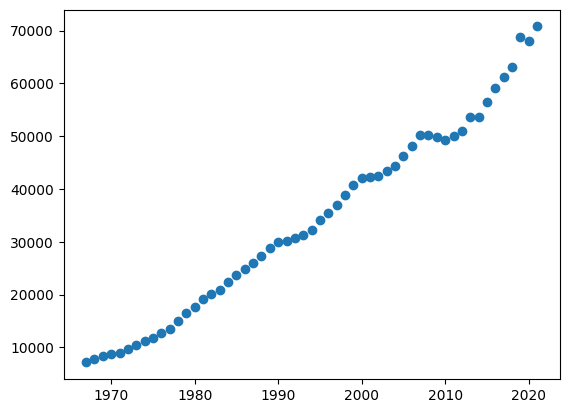

In [19]:
plt.scatter(
    x= df_median_income['Year'],
    y= df_median_income['Estimate']
)

Exploratory Data Analysis

Hypothesis Testing

Communication of Insights Attained